In [1]:
from utils import *

## Premiers modèles 

### Modèle linéaire

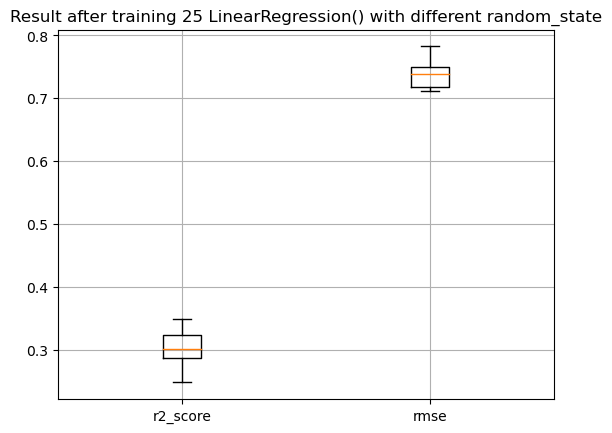

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'target'],
      dtype='object')


array([ 0.13794193, -0.23993203, -0.00493773,  0.32792249, -0.02292712,
        0.11663431, -0.09966208, -0.3574022 ,  0.07786299,  0.1012844 ,
        0.23997954,  0.18383888])

In [31]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
value = multi_test(linear_model,X,Y,n=25)
print(data_train.columns)
linear_model.coef_

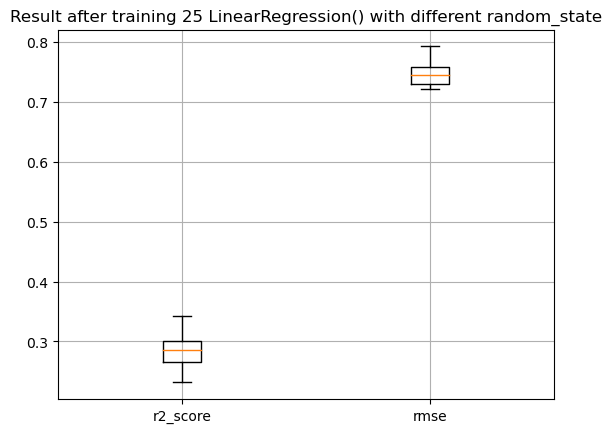

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'target'],
      dtype='object')


array([ 0.41873365,  0.12315907,  0.06543707, -0.26801485,  0.10572591])

In [34]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
value = multi_test(linear_model,X[["alcohol","residual sugar","sulphates","volatile acidity","wine_type"]],Y,n=25)
print(data_train.columns)
linear_model.coef_

In [3]:
model = LinearRegression()

### Regression Logistique

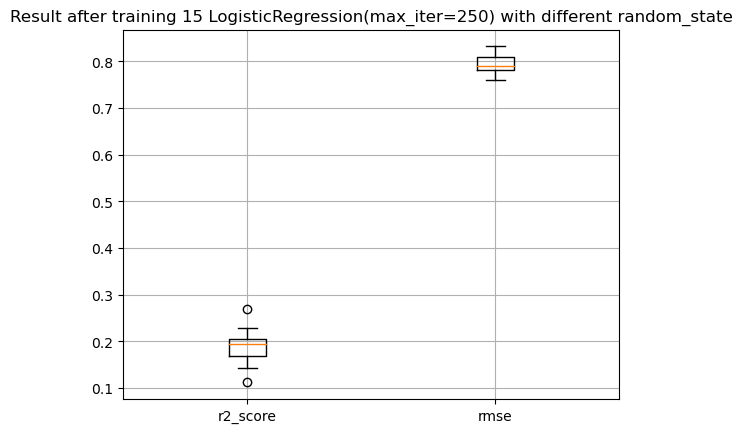

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'target'],
      dtype='object')


array([[-0.65307091,  0.08943639, -0.0654466 ,  0.97575534, -0.13621977],
       [-0.9279361 , -0.61563276, -0.02520239,  0.94971846, -0.77351074],
       [-1.12571063, -0.20665749, -0.08886932,  0.31960658,  0.13206145],
       [-0.12506752,  0.06110429,  0.11551484, -0.33033481,  0.37246615],
       [ 0.72226633,  0.19388884,  0.32495973, -0.7655172 ,  0.36639458],
       [ 1.11894608,  0.35615979,  0.14047865, -0.78119529,  0.31533022],
       [ 0.99057274,  0.12170093, -0.40143491, -0.36803309, -0.27652189]])

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=250)
value = multi_test(logistic_model,X[["alcohol","residual sugar","sulphates","volatile acidity","wine_type"]],Y,n=15)
print(data_train.columns)
logistic_model.coef_

In [112]:
submission_model = train_and_eval(logistic_model,X,Y,full_train=True)
data_test = pd.read_csv("Data\wine_test.csv", index_col=0)
test = submission(submission_model,X,data_test,name_file="logistic_soumission.csv")

### SVM

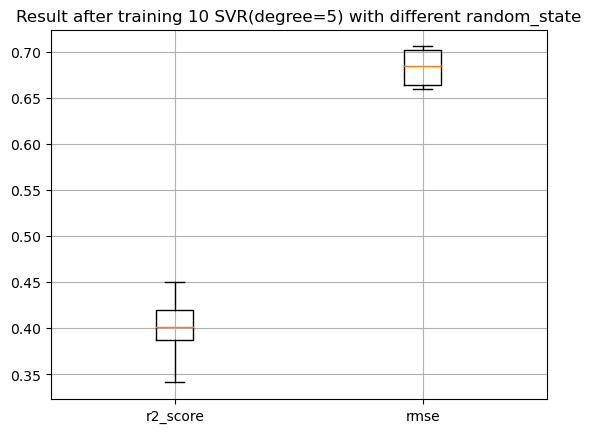

In [8]:
from sklearn import svm
svm_model = svm.SVR(kernel="rbf",degree=5)
value = multi_test(svm_model,X,Y,n=10)

In [11]:
from sklearn import svm
svm_model = svm.SVR()
submission(svm_model,name_file = "Soumissions/svm_soumission.csv")

,wine_ID,target
0,5316,5.836451
1,5210,5.136610
2,3518,6.112010
3,1622,4.736397
4,2443,5.228315
...,...,...
1945,6277,6.079256
1946,3035,6.214019
1947,3410,6.005678
1948,6099,5.941801


### RandomForest

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(10,criterion="absolute_error")
value = multi_test(forest_model,X,Y,n=5)

KeyboardInterrupt: 

In [135]:
forest_scores = [train_and_eval(forest_model,X,Y,random_state=k)[2] for k in range(50)]
scores_r2 = [forest_scores[i][0] for i in range(len(forest_scores))]
scores_rmse = [forest_scores[i][1] for i in range(len(forest_scores))]
all_scores = [scores_r2,scores_rmse]

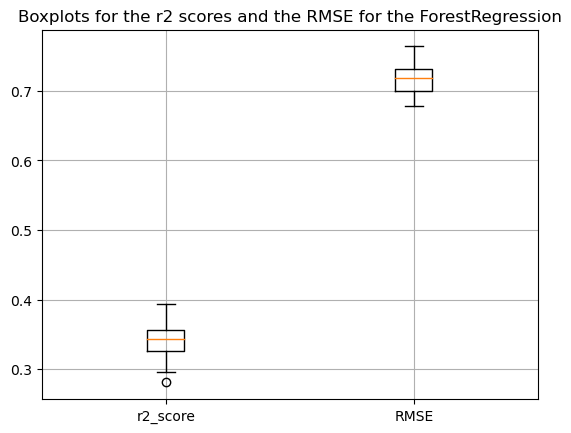

In [136]:
plt.boxplot(all_scores,labels=["r2_score","RMSE"])
plt.grid()
plt.title("Boxplots for the r2 scores and the RMSE for the ForestRegression")
plt.show()

In [146]:
submission_model = train_and_eval(forest_model,X,Y,full_train=True)
test = submission(submission_model,name_file="forest_soumission.csv")

### K Voisins

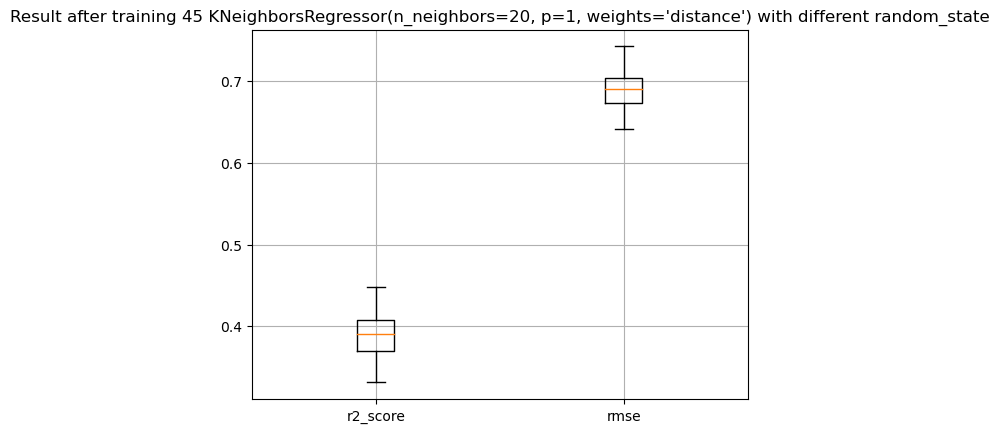

In [27]:
from sklearn.neighbors import KNeighborsRegressor
neighbor_model = KNeighborsRegressor(weights="distance",n_neighbors=20,algorithm="auto",p=1)
value = multi_test(neighbor_model,X[["alcohol","residual sugar","volatile acidity","wine_type"]],Y,n=45)

In [65]:
submission(neighbor_model,name_file = "neighbor_soumission.csv")

,wine_ID,target
0,5316,5.784787
1,5210,5.301198
2,3518,5.742169
3,1622,5.133944
4,2443,5.112357
...,...,...
1945,6277,6.000000
1946,3035,6.188453
1947,3410,6.170298
1948,6099,6.399121


### Gradient Boosting

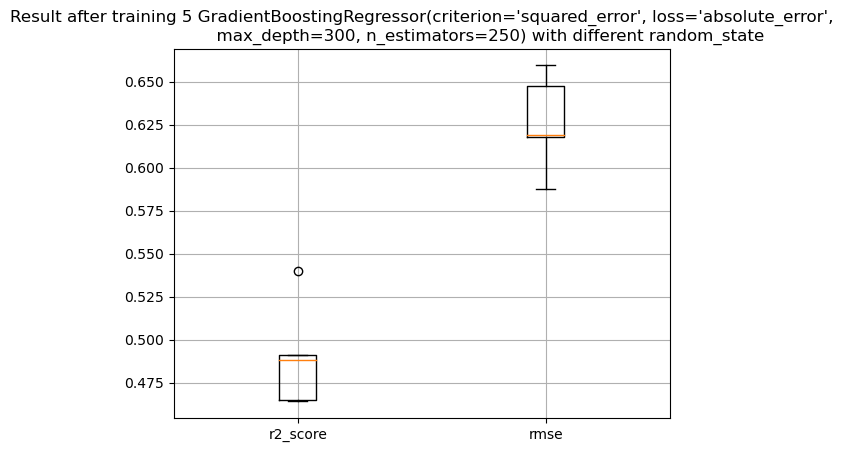

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(learning_rate = 0.1,n_estimators=250,max_depth=300,loss="absolute_error",criterion="squared_error")
value = multi_test(boosting_model,X,Y,n=5)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(learning_rate = 0.1,n_estimators=250,max_depth=400,loss="absolute_error",criterion="squared_error")
submission(boosting_model,name_file = "Soumissions/boosting_soumission.csv")

,wine_ID,target
0,5316,5.867555
1,5210,5.230574
2,3518,5.585004
3,1622,5.299027
4,2443,4.990155
...,...,...
1945,6277,5.999994
1946,3035,6.266143
1947,3410,6.451908
1948,6099,5.937714


### Approche classification

## Reg Logistique 

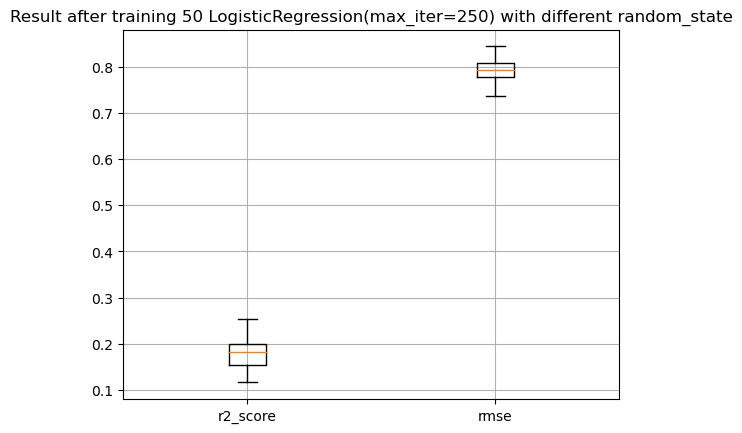

In [15]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=250)
value = multi_test(logistic_model,X,Y,n=50,random_start=420)

## Kforest

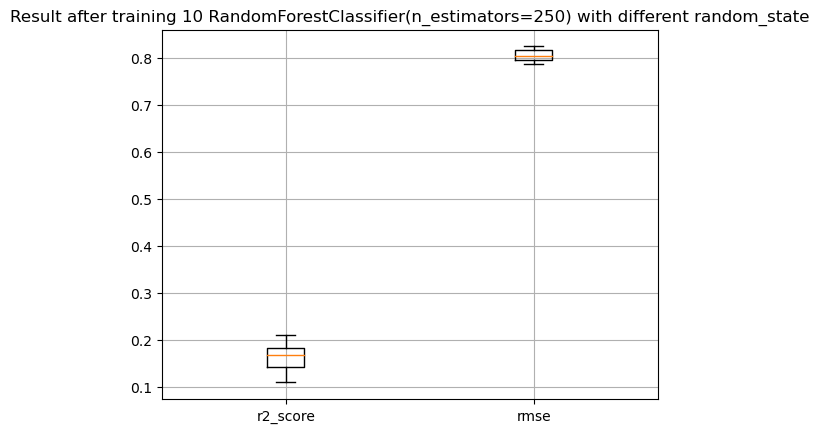

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_model_classif = RandomForestClassifier(n_estimators=250)
value = multi_test(forest_model_classif,X[["alcohol","residual sugar","volatile acidity","wine_type"]],Y,n=10)

### Kneighbors

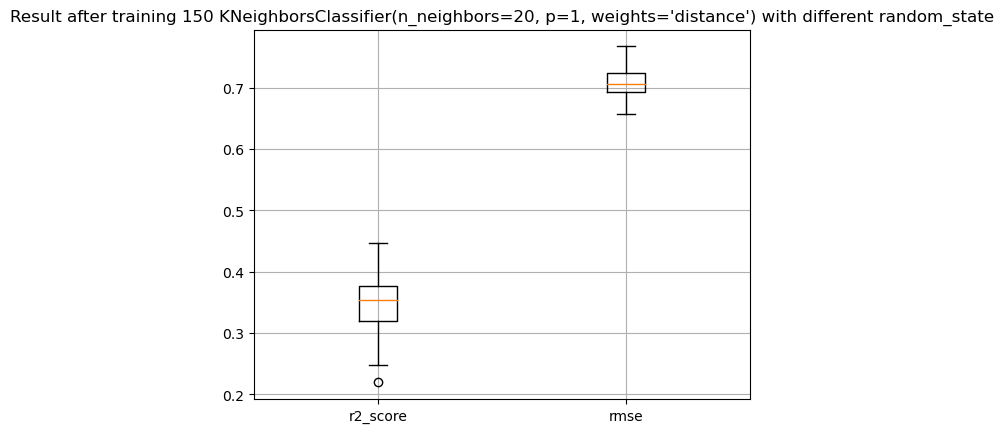

In [21]:
from sklearn.neighbors import KNeighborsClassifier
rfyui = X[["alcohol","residual sugar","volatile acidity","wine_type"]]
neighbors_model_classif = KNeighborsClassifier(n_neighbors=20,weights="distance",p=1)
value = multi_test(neighbors_model_classif,X,Y,n=150)

In [5]:
submission(neighbors_model_classif,name_file = "neighbor_soumission_classif.csv")

,wine_ID,target
0,5316,6
1,5210,5
2,3518,5
3,1622,5
4,2443,5
...,...,...
1945,6277,6
1946,3035,6
1947,3410,6
1948,6099,6


## Boosting Classif

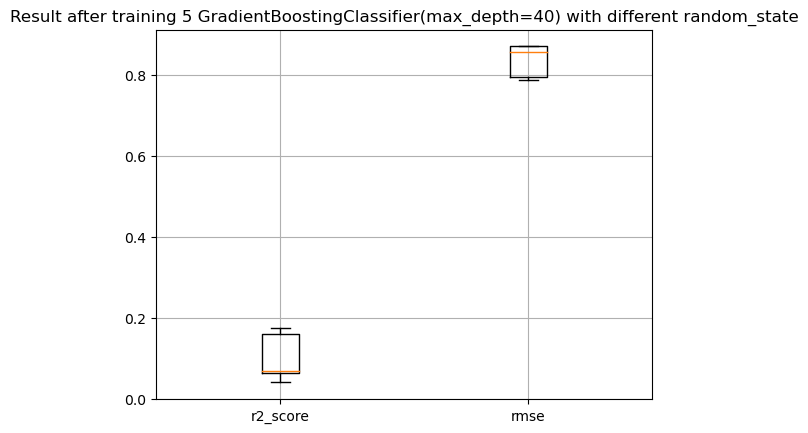

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
boosting_model = GradientBoostingClassifier(max_depth=40)
value = multi_test(boosting_model,X,Y,n=5)

### "Aggregat d'experts"

In [3]:
import pandas as pd
moyenne_submission(["Soumissions/boosting_soumission.csv",
                    "Soumissions/forest_soumission.csv","Soumissions/svm_soumission.csv"],path_result = "Soumissions/mean_submission.csv")

### MLP

In [23]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Charger les données
data_train = pd.read_csv("Data/wine_train.csv", index_col=0)
X = data_train.drop("target", axis=1)
Y = data_train.target

data_test = pd.read_csv("Data/wine_test.csv", index_col=0)

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

# Normalisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled)
Y_train_tensor = torch.FloatTensor(Y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)

# Définir le modèle MLP en utilisant PyTorch
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size,hidden_size//2)
        self.fc2 = nn.Linear(hidden_size//2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
hidden_size = 2048
output_size = 1

model = MLPModel(input_size, hidden_size, output_size)

# Définir l'optimiseur et la fonction de perte
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Entraînement du modèle
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()

# Évaluation du modèle
with torch.no_grad():
    model.eval()
    Y_pred = model(X_test_tensor)
    r2 = r2_score(Y_test, Y_pred.numpy())
    rmse = mean_squared_error(Y_test, Y_pred.numpy()) ** 0.5

    print(f"R-squared: {r2:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(Y_pred)


R-squared: 0.33
RMSE: 0.69
tensor([[6.2986],
        [5.6721],
        [5.8408],
        [5.6210],
        [6.3184],
        [6.6116],
        [6.7522],
        [5.9156],
        [5.0850],
        [5.7425],
        [7.6533],
        [4.9898],
        [5.7034],
        [5.7492],
        [5.7800],
        [5.8538],
        [5.5848],
        [5.0976],
        [6.2142],
        [6.2292],
        [5.7728],
        [5.0380],
        [5.3860],
        [5.0385],
        [5.1895],
        [5.1431],
        [6.0584],
        [6.1120],
        [6.9800],
        [7.6006],
        [6.4120],
        [4.9486],
        [5.6115],
        [4.7114],
        [5.7893],
        [6.8742],
        [5.9235],
        [5.1488],
        [5.9827],
        [5.1821],
        [6.2199],
        [6.3643],
        [5.8543],
        [5.9799],
        [6.1183],
        [5.6263],
        [5.4469],
        [5.5404],
        [5.3751],
        [5.7534],
        [5.9887],
        [6.2794],
        [5.9086],
        [5.1440],
 